In [1]:
from sklearn import datasets
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [2]:
data_iris = datasets.load_iris(as_frame=True)
print(data_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data_breast_cancer['data'][['mean area', 'mean smoothness']],
                                                    data_breast_cancer['target'],
                                                    test_size=0.2, 
                                                    random_state=42)

In [4]:
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf1.fit(X_train, y_train)

C:\miniforge3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\miniforge3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge', random_state=42)

In [5]:
svm_clf2 = Pipeline([("scaler", StandardScaler()),("linearSVC", LinearSVC(C=1, loss="hinge", random_state=42)),])
svm_clf2.fit(X_train, y_train)

C:\miniforge3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge', random_state=42))])

In [6]:

train_accuracy_model1 = svm_clf1.score(X_train, y_train)
test_accuracy_model1 = svm_clf1.score(X_test, y_test)

train_accuracy_model2 = svm_clf2.score(X_train, y_train)
test_accuracy_model2 = svm_clf2.score(X_test, y_test)

In [7]:
list = [train_accuracy_model1, test_accuracy_model1, train_accuracy_model2, test_accuracy_model2]
with open('bc_acc.pkl', 'wb') as f:
    pickle.dump(list, f)

In [8]:
X_trainI, X_testI, y_trainI, y_testI = train_test_split(data_iris['data'][['petal length (cm)', 'petal width (cm)']],
                                                    data_iris['target'] == 2,
                                                    test_size=0.2, 
                                                    random_state=42)

In [9]:
svm_clf1I = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf1I.fit(X_trainI, y_trainI)

C:\miniforge3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\miniforge3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge', random_state=42)

In [10]:
svm_clf2I = Pipeline([("scaler", StandardScaler()),("linearSVC", LinearSVC(C=1, loss="hinge", random_state=42)),])
svm_clf2I.fit(X_trainI, y_trainI)

C:\miniforge3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge', random_state=42))])

In [11]:

train_accuracy_model1I = svm_clf1I.score(X_trainI, y_trainI)
test_accuracy_model1I = svm_clf1I.score(X_testI, y_testI)

train_accuracy_model2I = svm_clf2I.score(X_trainI, y_trainI)
test_accuracy_model2I = svm_clf2I.score(X_testI, y_testI)

In [12]:
listI = [train_accuracy_model1I, test_accuracy_model1I, train_accuracy_model2I, test_accuracy_model2I]
print(listI)

[0.9416666666666667, 1.0, 0.9416666666666667, 1.0]


In [13]:
with open('iris_acc.pkl', 'wb') as f:
    pickle.dump(listI, f)

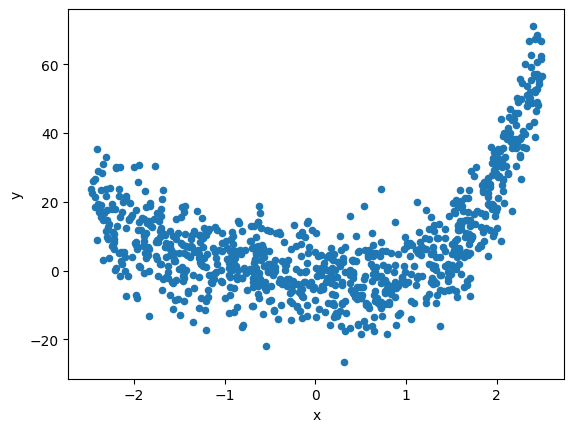

In [14]:
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y=w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

X_trainR, X_testR, y_trainR, y_testR = train_test_split(X.reshape(-1, 1),
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [15]:
from sklearn.svm import LinearSVR, SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
svm_poly_reg = Pipeline([('poly_features', PolynomialFeatures(degree=4)),('lSVR', LinearSVR()),])
svm_poly_reg.fit(X_trainR, y_trainR)
y_train_pred = svm_poly_reg.predict(X_trainR)
y_test_pred = svm_poly_reg.predict(X_testR)
train_mse = mean_squared_error(y_trainR, y_train_pred)
test_mse = mean_squared_error(y_testR, y_test_pred)

C:\miniforge3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\miniforge3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
print(train_mse)
print(test_mse)

63.390459751207224
62.08526639046376


In [17]:
svm_poly_reg2 = SVR(kernel="poly", degree=4)
svm_poly_reg2.fit(X_trainR, y_trainR)

SVR(degree=4, kernel='poly')

In [18]:
y_train_pred2 = svm_poly_reg2.predict(X_trainR)
y_test_pred2 = svm_poly_reg2.predict(X_testR)
train_mse2 = mean_squared_error(y_trainR, y_train_pred2)
test_mse2 = mean_squared_error(y_testR, y_test_pred2)
print(train_mse2)
print(test_mse2)

103.04799540975527
111.27021092326447


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10], 
    'coef0': [0.1, 1, 10]
}
model = SVR()
results = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
results.fit(X.reshape(-1,1), y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'coef0': [0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [20]:
print(results)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'coef0': [0.1, 1, 10]},
             scoring='neg_mean_squared_error')


In [21]:
best_model = results.best_estimator_
print(best_model)

SVR(C=10, coef0=0.1)


In [22]:
svm_poly_reg3 = SVR(kernel="poly", degree=4, C=10, coef0=0.1)
svm_poly_reg3.fit(X_trainR, y_trainR)

SVR(C=10, coef0=0.1, degree=4, kernel='poly')

In [23]:
y_train_pred3 = svm_poly_reg3.predict(X_trainR)
y_test_pred3 = svm_poly_reg3.predict(X_testR)
train_mse3 = mean_squared_error(y_trainR, y_train_pred3)
test_mse3 = mean_squared_error(y_testR, y_test_pred3)
print(train_mse3)
print(test_mse3)

65.12503101735079
67.27826385970135


In [30]:
list3 = [train_mse, test_mse, train_mse3, test_mse3]
print(list3)

[63.390459751207224, 62.08526639046376, 65.12503101735079, 67.27826385970135]


In [31]:
with open('reg_mse.pkl', 'wb') as f:
    pickle.dump(list3, f)